<a href="https://cognitiveclass.ai/">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Logo/SNLogo.png" width="200" align="center">
</a>

<h1>Lab - Image Processing and Analysis in Python with OpenCV</h1>
<b>Welcome!</b> After completing this lab you will:
<h5> 1. Learn to download, read and display images using Python, OpenCV and Matplotlib </h5>
<h5> 2. Learn to apply various Image Processing techniques using Python and OpenCV </h5>
<h5> 3. Understand about the importance of various Image Processing techniques </h5>
<h5> 4. Analyze images using Histograms </h5>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <br>
    <br>
    <h2>Table of Contents</h2>
    <ul>
        <li><a href="#ref0">OpenCV</a></li>
        <li><a href="#ref1">Downloading and plotting images in Python using OpenCV and Matplotlib</a></li>
        <li><a href="#ref2">Image Processing using OpenCV</a></li>
        <li><a href="#ref3">Analyzing Images using Histograms</a></li>
    <li><a href="#ref4">Exercises</a></li>
    </ul>
    <br>
    <p>Estimated Time Needed: <strong>1 hr</strong></p>
</div>
<hr>

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Images/CV0101-image-processing-lab.png" width="640">

<a id="ref0"></a>

## OpenCV [Homepage](http://opencv.org/)
- OpenCV stands for: Open Source Computer Vision Library
- includes C++, C, Python and Java interfaces

#### Import the OpenCV package

**Did you know?** The package is called **`cv2`** in Python. The `2` in `cv2` doesn't refer to a particular package version.

In [2]:
import cv2
print(cv2.__version__)

4.2.0


<a id="ref1"></a>

## Downloading and plotting images in Python using OpenCV and Matplotlib

#### Download an image

Let's first download an image, using the `urllib` package. We'll need to specify a `url` of an image and a `filename`.

We'll be downloading the following image of Donald Trump and Justin Trudeau, the President of the U.S. and Prime Minister of Canada, respectively.
<img src="https://upload.wikimedia.org/wikipedia/commons/7/76/Donald_Trump_Justin_Trudeau_2017-02-13_02.jpg" width=400>

In [5]:
import urllib.request

#Set the url and filename
trumptrudeau_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/ee/Donald_Trump_and_Justin_Trudeau_in_the_Oval_Office_-_2017.jpg/1200px-Donald_Trump_and_Justin_Trudeau_in_the_Oval_Office_-_2017.jpg"
trumptrudeau_filename = "trumptrudeau.jpg"


urllib.request.urlretrieve(trumptrudeau_url, trumptrudeau_filename) # downloads file as "trumptrudeau.jpg"


('trumptrudeau.jpg', <http.client.HTTPMessage at 0x7feb410b1978>)

**Verify that the image has downloaded**

At this point, you should now see the file listed in the files directory in the left-sidebar of the JupyterLab environment. If this side menu is hidden, you can go to `View`>`View Left-Sidebar`.

Alternatively, you can run the command below to check the files in your current directory:

In [6]:
import os
os.listdir(os.curdir) #shows all files in current directory

['Classifying_Images_Using_Watson_API_v3.ipynb',
 'excercide_image.jpg',
 '.ipynb_checkpoints',
 'exercise_image.jpg',
 'ex_image.jpg',
 'image.jpg',
 'Image_Processing_with_OpenCV.ipynb',
 'trumptrudeau.jpg']

In [7]:
#Is trump_filename in your directory?
print(trumptrudeau_filename in os.listdir(os.curdir))

True


**Plotting images in Jupyter Notebooks**

Next, let's display the image into this notebook, using OpenCV. We'll also be borrowing from the plotting library, `matplotlib`, to help display the images.

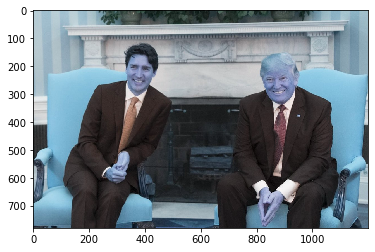

In [24]:
from matplotlib import pyplot as plt
%matplotlib inline

trumptrudeau = cv2.imread(trumptrudeau_filename)

plt.imshow(trumptrudeau)

<a id="ref2"></a>
## Image Processing using OpenCV

Hm... the Presidents are looking a little _blue_ in the above photo, wouldn't you say?

**Fix colors when displaying images**

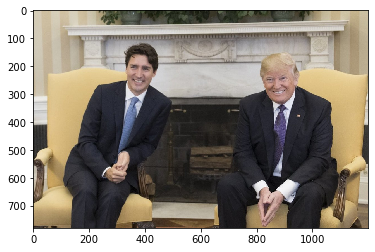

In [9]:
img_corrected = cv2.cvtColor(trumptrudeau, cv2.COLOR_BGR2RGB)

plt.imshow(img_corrected)

**Remove the axes around the image**

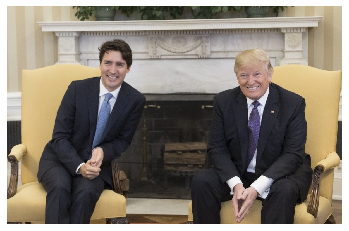

In [10]:
plt.axis("off") #remove axes ticks
plt.imshow(img_corrected)

**Change the size of the displayed image in the notebook**

Note that this simply changes the display size of the image, not the actual image dimensions

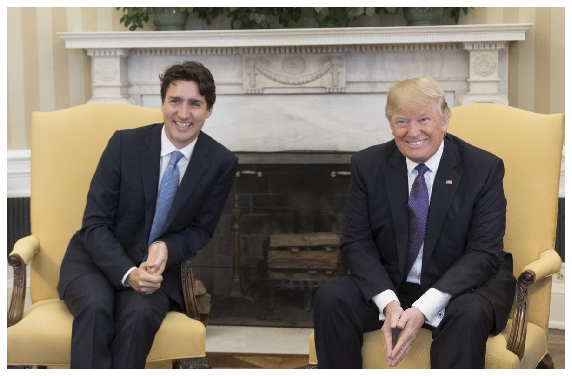

In [11]:
from pylab import rcParams

rcParams['figure.figsize'] = 10, 12

plt.axis("off") #remove axes ticks
plt.imshow(img_corrected)

**Convert to Grayscale**

Text(0.5, 1.0, 'Grayscale Image')

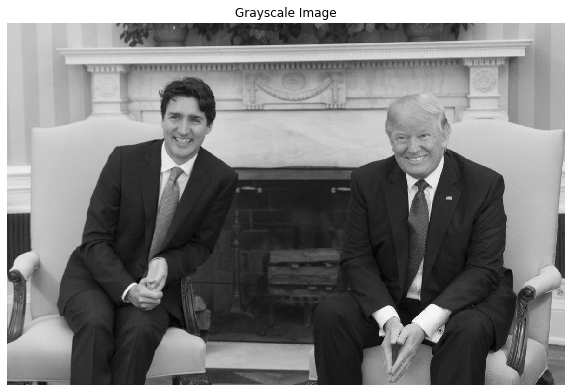

In [12]:
gray_trumptrudeau = cv2.cvtColor(trumptrudeau, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_trumptrudeau, cmap = 'gray')
plt.axis("off") #remove axes ticks
plt.title('Grayscale Image')

**Canny Edge Detection**

Canny Edge Detection is an algorithm used to detect edges in an image, and was developed by John F. Canny in 1986.  
Full OpenCV documentation on Canny Edge Detection: [here](https://docs.opencv.org/master/da/d22/tutorial_py_canny.html)

(Text(0.5, 1.0, 'Edge Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

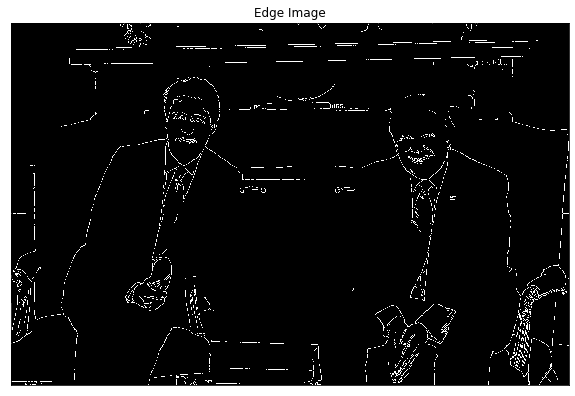

In [25]:
rcParams['figure.figsize'] = 10, 12


edges = cv2.Canny(img_corrected, 
                  threshold1=100, 
                  threshold2=200)

plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

#### Try different levels of threshold:

(Text(0.5, 1.0, 'Edge Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

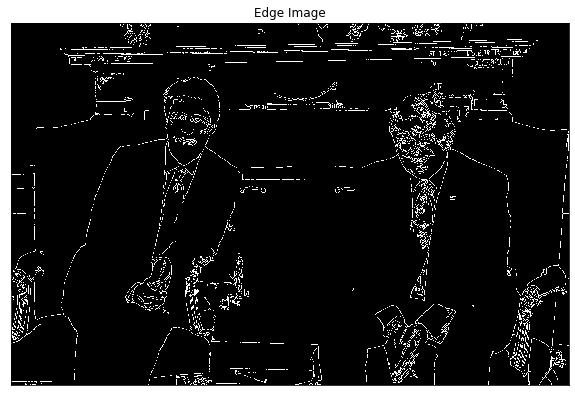

In [30]:
rcParams['figure.figsize'] = 10, 12

edges = cv2.Canny(img_corrected, 
                  threshold1=1,   ## try different values here
                  threshold2=200) ## try different values here

plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Edge Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

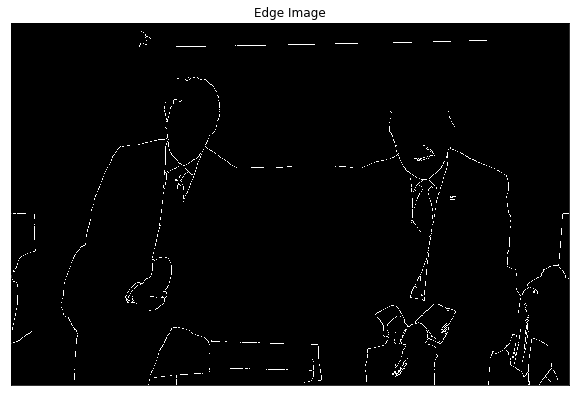

In [31]:
rcParams['figure.figsize'] = 10, 12

edges = cv2.Canny(img_corrected, 
                  threshold1=100,   ## try different values here
                  threshold2=500) ## try different values here

plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

**Want to know the parameters of a function?**

Try using a question mark `?` before a method to display the help doc for the method.

In [32]:
?cv2.Canny

Docstring:
Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]) -> edges
.   @brief Finds edges in an image using the Canny algorithm @cite Canny86 .
.   
.   The function finds edges in the input image and marks them in the output map edges using the
.   Canny algorithm. The smallest value between threshold1 and threshold2 is used for edge linking. The
.   largest value is used to find initial segments of strong edges. See
.   <http://en.wikipedia.org/wiki/Canny_edge_detector>
.   
.   @param image 8-bit input image.
.   @param edges output edge map; single channels 8-bit image, which has the same size as image .
.   @param threshold1 first threshold for the hysteresis procedure.
.   @param threshold2 second threshold for the hysteresis procedure.
.   @param apertureSize aperture size for the Sobel operator.
.   @param L2gradient a flag, indicating whether a more accurate \f$L_2\f$ norm
.   \f$=\sqrt{(dI/dx)^2 + (dI/dy)^2}\f$ should be used to calculate the imag

<a id="ref3"></a>
## Analyzing Images using Histograms

**Histograms - Grayscale**

Histograms allow you to quickly determine the number of pixels that are on a scale "black pixel" (0) to "white pixel" (255).

Execute the code cell below to see the histogram of the image of President Trump and President Trudeau:

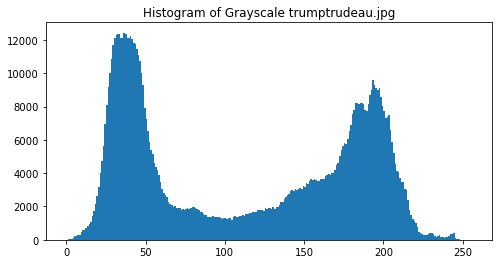

In [33]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

rcParams['figure.figsize'] = 8,4

plt.hist(gray_trumptrudeau.ravel(),256,[0,256])
plt.title('Histogram of Grayscale trumptrudeau.jpg')
plt.show()

**What's in the histogram?**

Like any other histogram, this graph shows the **count** of something. In this case, it's the _number of pixels in the image_ that are either _dark_ (towards the left of the graph) or _lighter_ (towards the right of the graph).

**Why are histograms important**?
- If you're concerned about whether the image is properly exposed (not too dark and not too bright), then histograms are a great way of checking the distribution of your lighter and darker pixels!
- If your images are overexposed (too bright) or underexposed (too dark), you can fix exposure with OpenCV in Python (although you may lose some image quality). 
- This might be important if you're developing an app where users are taking photos and your app is trying to classify the objects inside the image. If it's too dark or too light, the objects may not be recognizable. 


**How do you read the histogram?**
- On the **x-axis**, the values normally range from 0 (black) to 255 (white). So darker pixels are on the left, and whiter pixels are to the right. In the `matplotlib` chart above, the x-axis goes from 0 to 256, since each pixel is represented as a bin start from 0 to 0.99, and ends with 255 to 255.99.   
- The **y-axis** shows the number of pixels found in the image on the scale of black to white.

**Observations:**
The grayscale histogram above shows that: 
- lots of pixels around `x = 30`, which are **darker pixels**.
- lots of pixels around `x = 200`, which are **lighter pixels**.

**Interpretation:**
- the image appears to have lots of very dark, and very light pixels, but not a lot of pixels in between. Looking at the image of the Presidents, this is readily apparent -- the darker pixels seem to come from the black suits and the fireplace. A lot of the lighter pixels come from the furniture and walls.

**Histograms - Color scale (RGB)**

#### Interpreting RGB histograms
Like grayscale histograms, RGB also shows the count distribution of pixels from black (`x=0`) to full color (`x=255`).

Here is a color image of the presidents:

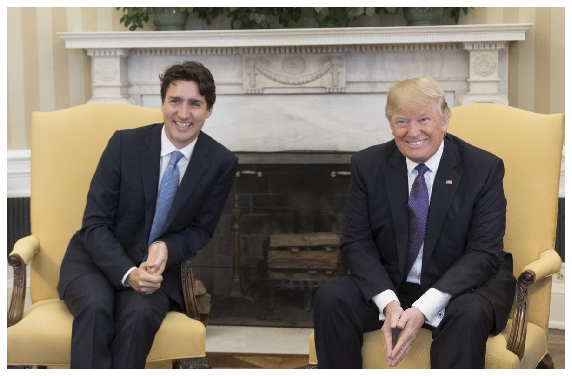

In [34]:
rcParams['figure.figsize'] = 10, 12

plt.axis("off") #remove axes ticks
plt.imshow(img_corrected)

And the following is an RGB histogram for the above image

#### RGB histogram

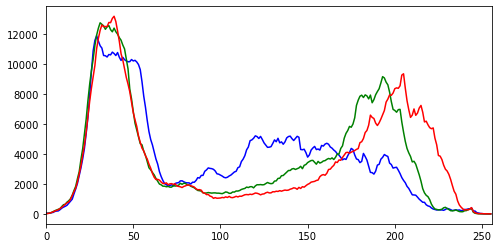

In [36]:
rcParams['figure.figsize'] = 8, 4

color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([trumptrudeau],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In the histogram above, you can observe that:
- of the lighter pixels (around `x >= 200`), there are more red pixels than green or blue pixels. This is likely because of the redness in the faces of the presidents.
- there seems to be a similar amount of dark red, dark blue, and dark green pixels (around `x<50`)
- in terms of middle-tones, there seems to be more blue pixels than green or red. This is likely because of the neckties worn by the presidents.

<a id="ref4"></a>
## Exercises

**Exercise 1**

1.1. Download an image of your choosing, and display it  
1.2. Convert the image to grayscale, and display it

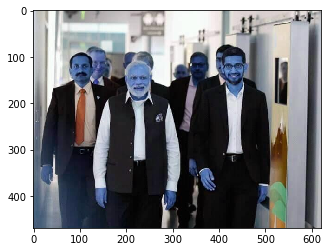

In [58]:
# 1.1. Download an image of your choosing and display it

# Write your code below:

pichai_url='https://sksbiography.com/wp-content/uploads/2020/02/sundar-with-modi.jpg'
pichai_file="sundar_modi.jpg"
urllib.request.urlretrieve(pichai_url,pichai_file)
pichai=cv2.imread(pichai_file)
plt.imshow(pichai)

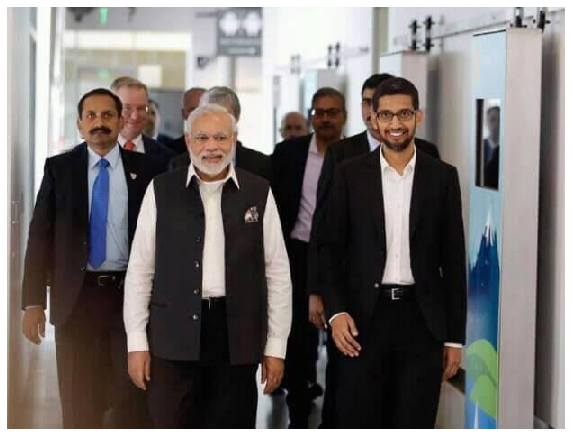

In [59]:
img_corrected = cv2.cvtColor(pichai, cv2.COLOR_BGR2RGB)
from pylab import rcParams
rcParams['figure.figsize'] = 10, 12
plt.axis("off")
plt.imshow(img_corrected)

Double-click <font color="red"><b><u>here</b></u></font> for the solution.

<!-- The answer is below:

You should specify the download_image_url and download_image_filename


download_image_url = ""
download_image_filename = ""
urllib.request.urlretrieve(download_image_url, download_image_filename)

img = cv2.imread(download_image_filename)
plt.imshow(img)

--->

Text(0.5, 1.0, 'Gray_scale_image')

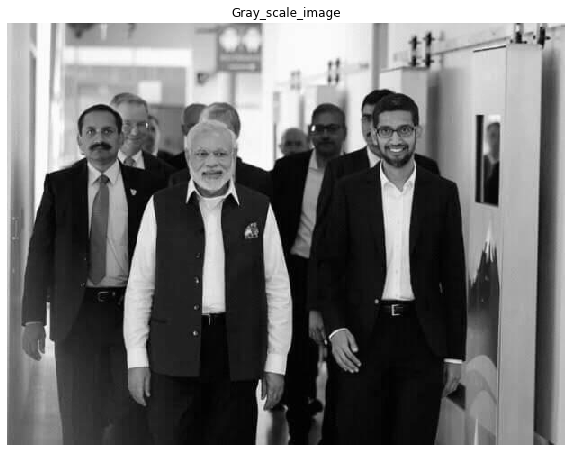

In [60]:
# 1.2. Convert the image to grayscale and display it

# Write your code below:
pichai_gray=cv2.cvtColor(pichai,cv2.COLOR_BGR2GRAY)
plt.imshow(pichai_gray,cmap="gray")
plt.axis("off")
plt.title("Gray_scale_image")

Double-click <font color="red"><b><u>here</b></u></font> for the solution.

<!-- The answer is below:

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap = "gray")
plt.axis("off") #remove axes ticks
plt.title('Grayscale Image')

--->

**Exercise 2**

2.1. Using your grayscale image from Exercise 1, display its grayscale histogram  
2.2. Using your color image from Exercise 1, display its color histogram  
2.3. Look at your histogram and think about how its pixels are distributed. What are some observations that you can make?

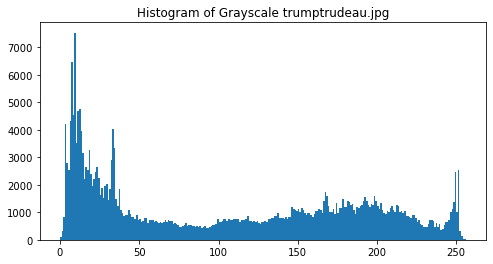

In [62]:
# 2.1. Using your grayscale image from Exercise 1, display its grayscale histogram  

# Write your code below:

import cv2
import numpy as np
from matplotlib import pyplot as plt

rcParams['figure.figsize'] = 8,4

plt.hist(pichai_gray.ravel(),256,[0,256])
plt.title('Histogram of Grayscale trumptrudeau.jpg')
plt.show()

Double-click <font color="red"><b><u>here</b></u></font> for the solution.

<!-- The answer is below:

rcParams['figure.figsize'] = 8,4
plt.hist(gray_img.ravel(),256,[0,256])
plt.title('Histogram of Grayscale Image')
plt.show()

--->

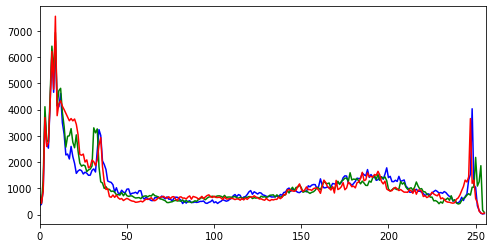

In [67]:
# 2.2. Using your color image from Exercise 1, display its color histogram  

# Write your code below:

rcParams['figure.figsize'] = 8, 4

color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img_corrected],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()


Double-click <font color="red"><b><u>here</b></u></font> for the solution.

<!-- The answer is below:

colors = ('b','g','r')
for i,col in enumerate(colors):
    histr_color = cv2.calcHist([download_image_filename],[i],None,[256],[0,256])
    plt.plot(histr_color,color = col)
    plt.xlim([0,256])
plt.show()

--->

<h1>Thank you for completing this lab!</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<h2>Get IBM Watson Studio free of charge!</h2>
    <p><a href="https://cocl.us/NotebooksPython101bottom"><img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Logo/BottomAd.png" width="750" align="center"></a></p>
</div>

<h3>About the Authors:</h3>
<p>This lab was written by <a href="https://www.linkedin.com/in/sacchitchadha/" target="_blank" >Sacchit Chadha</a> and revised by Nayef Abou Tayoun</p>
<p><a href="https://www.linkedin.com/in/sacchitchadha/" target="_blank">Sacchit Chadha</a> is a Software Engineer at IBM, and is a rising senior pursuing a Bachelors Degree in Computer Science from the University of Waterloo. His work at IBM is focused on Computer Vision, Cloud Computing and Blockchain.</p>
<p>Nayef Abou Tayoun is a Cognitive Data Scientist at IBM, and is pursuing a Master's Degree in Artificial Intelligence.</p>

<hr>

Copyright &copy; 2019 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_source=cccopyrightlink&utm_medium=labs&utm_campaign=cc). This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/).